##  Prove if Zipf’s Law works in Natural Language or not.

###  Use ’glob’ to open and read file


In [101]:
import glob
from collections import Counter
import csv
import numpy as np
import matplotlib.pyplot as plt
import string


In [107]:
path = '/Users/tanya/nltk_data/corpora/inaugural/19*.txt'  # taking all the speeches from 20th century

totalwordcount = None

def appendWordCount(filename, totalwordcount):            # function to read 
    with open(filename, 'r', encoding="utf-8-sig") as f:
        wordcount = Counter(f.read().split())
        if (totalwordcount):
            return totalwordcount + wordcount             # append to existing wordcount from previous files
        else:
            return wordcount

for filename in glob.glob(path):
    totalwordcount = appendWordCount(filename, totalwordcount)    
        

###  Save the data as a CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 


In [108]:
exclude = set(string.punctuation)

with open('zipf.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    rank = 0
    for pair in totalwordcount.most_common():
        rank = (lambda x:x+1)(rank)                              # Increment rank variable before saving to the file
        word = ''.join(ch for ch in pair[0] if ch not in exclude)
        spamwriter.writerow([word, rank, pair[1]])


###  Open your CSV file, generate a log-log figure according to the data you saved (using Matplotlib).


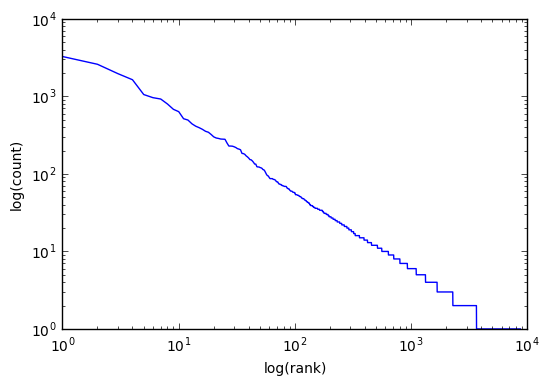

In [109]:

data = np.genfromtxt('zipf.csv', delimiter=',')

plt.loglog(data[:,1],data[:,2], basex=np.e, basey=np.e)  # Using rank as the x-axis and count as the y-axis
plt.axes().set_xscale('log')                             # Using log scales
plt.axes().set_yscale('log')
plt.axes().set_xlabel('log(rank)')
plt.axes().set_ylabel('log(count)')


plt.show()

### Conclusion:
#### Looking at the shape of the loglog graph above, it is clear that the text obtained from the 20th century inaugural speeches conforms to the Zipf's law